<a href="https://colab.research.google.com/github/Bmartins25/Minera-o-de-dados-e-LLM-s---UFMG/blob/main/TP2_Disciplina_Mineracao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunos: Bruno Bartolomeu e Carlos Large - Minecação de dados UFMG

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Carregar a base de dados com delimitador correto
data = pd.read_csv('Olympics_games_2024.csv', delimiter=';')

In [3]:
# Preparo dos dados para PCA e K-Means (excluindo colunas categóricas)
numeric_data = data[['gold', 'silver', 'bronze', 'total', 'gdp', 'population']].copy()

In [4]:
# Aplicar PCA para reduzir a dimensionalidade a 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data)

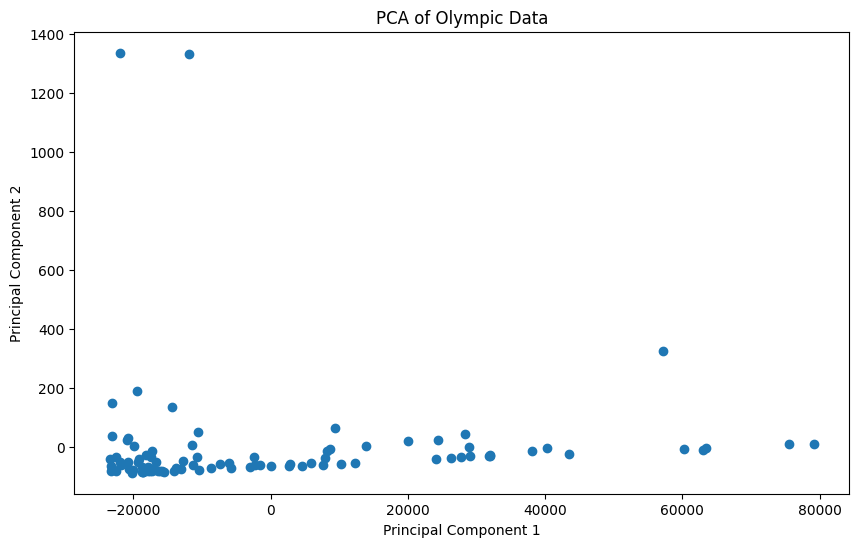

In [5]:
# Gráfico do resultado do PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Olympic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [6]:
# Aplicar KMeans clustering com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(numeric_data)

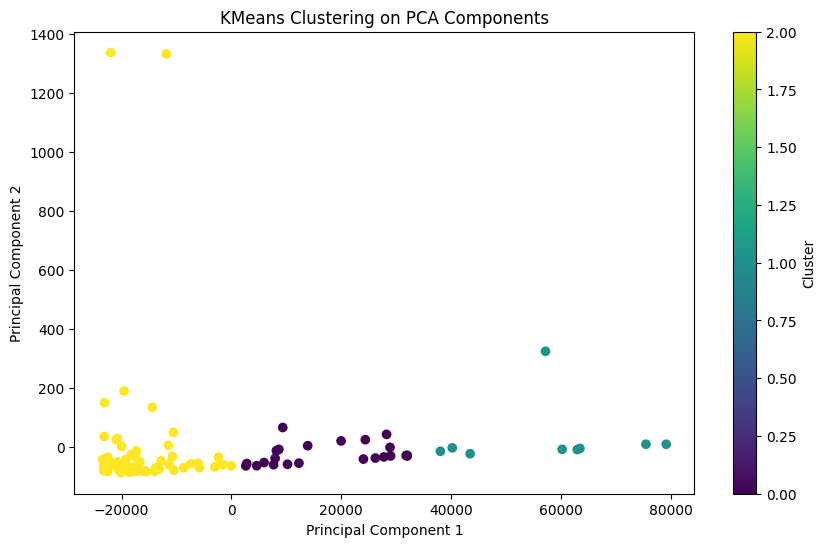

In [7]:
# Gráfico do resultado da clusterização KMeans nos componentes do PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [8]:
# Preparo dos dados para análise de regressão
X = data[['gdp', 'population']]
y = data['total']

In [9]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Aplicar Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [11]:
# Aplicar Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [12]:
# Avaliação dos modelos
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

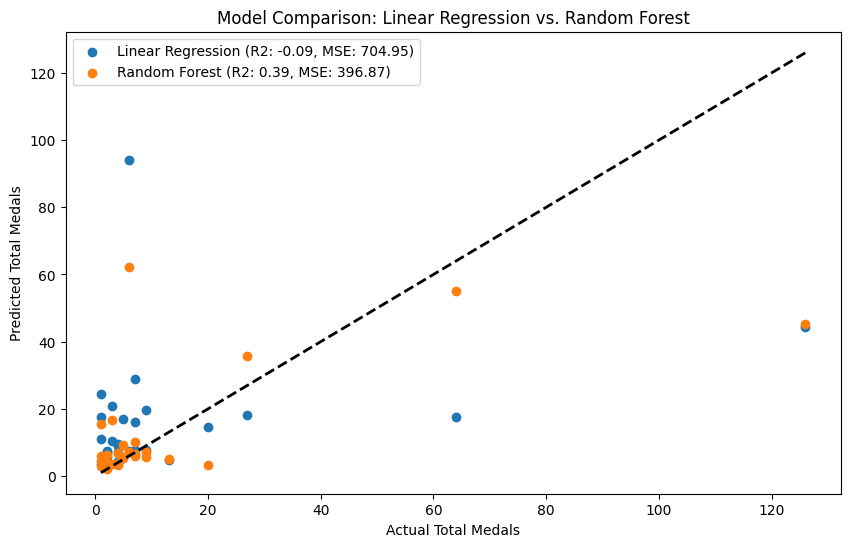

In [13]:
# Gráfico de comparação das previsões dos modelos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, label=f'Linear Regression (R2: {linear_r2:.2f}, MSE: {linear_mse:.2f})')
plt.scatter(y_test, y_pred_rf, label=f'Random Forest (R2: {rf_r2:.2f}, MSE: {rf_mse:.2f})')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Total Medals')
plt.ylabel('Predicted Total Medals')
plt.legend()
plt.title('Model Comparison: Linear Regression vs. Random Forest')
plt.show()